In [1]:
#Scrape and analyze mars weather data
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Create path to open webpage
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.58M/6.58M [00:00<00:00, 13.9MB/s]


In [3]:
#Go to website
browser.visit("https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html")

In [4]:
#Confirm success
html =browser.html
html[0:500]

'<html lang="en"><head>\n  <meta charset="utf-8">\n  <meta name="viewport" content="width=device-width, initial-scale=1">\n  <meta name="description" content="">\n  <meta name="author" content="Mark Otto, Jacob Thornton, and Bootstrap contributors">\n  <meta name="generator" content="Hugo 0.84.0">\n  <title>Mars Temperature Data</title>\n\n  <link rel="canonical" href="https://getbootstrap.com/docs/5.0/examples/jumbotron/">\n\n  <!-- Bootstrap core CSS -->\n  <link rel="stylesheet" href="https://stackpath.b'

In [5]:
#Create BeautifulSoup 
mars = soup(html)
type(mars)

bs4.BeautifulSoup

In [8]:
#Extract all rows 
tables = mars.find_all("tr", {"class": "data-row"})
len(tables)

1867

In [11]:
header = mars.find_all("th")
header

[<th>id</th>,
 <th>terrestrial_date</th>,
 <th>sol</th>,
 <th>ls</th>,
 <th>month</th>,
 <th>min_temp</th>,
 <th>pressure</th>]

In [12]:
#Show inspection of tables
table = tables[0]
table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

In [14]:
#Try and find terrestrial_date


In [31]:
#List of dfs
table = mars.find("table")
str(table)
df = pd.read_html(str(table))[0]
df
#type(DF)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [34]:
#Create a loop through the data to create the DataFrame
df["terrestrial_date"] = pd.to_datetime(df["terrestrial_date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


In [42]:
# 1. How many months on Mars?
len(df.month.unique())

12

In [41]:
# 2. How many Martian days' worth of data are there?
#df.sort_values("sol", ascending=False)
len(df.sol.unique())

1867

In [63]:
# 3.What is the average lowest temp by month?
df.groupby("month")["min_temp"].min()

month
1    -82.0
2    -86.0
3    -90.0
4    -89.0
5    -85.0
6    -84.0
7    -78.0
8    -75.0
9    -78.0
10   -81.0
11   -78.0
12   -81.0
Name: min_temp, dtype: float64

<AxesSubplot:xlabel='Months', ylabel='Temp in Celsius'>

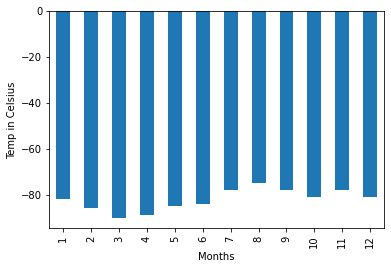

In [65]:
df.groupby("month")["min_temp"].min().plot(kind="bar", xlabel="Months", ylabel="Temp in Celsius")

<AxesSubplot:xlabel='Months', ylabel='Temp in Celsius'>

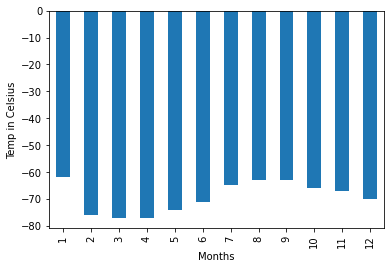

In [66]:
#Hottest temps
df.groupby("month")["min_temp"].max().plot(kind="bar", xlabel="Months", ylabel="Temp in Celsius")


In [47]:
#Added a year column just for fun
df["terrestrial_year"] = df.terrestrial_date.dt.year
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure,terrestrial_year
0,2,2012-08-16,10,155,6,-75.0,739.0,2012
1,13,2012-08-17,11,156,6,-76.0,740.0,2012
2,24,2012-08-18,12,156,6,-76.0,741.0,2012
3,35,2012-08-19,13,157,6,-74.0,732.0,2012
4,46,2012-08-20,14,157,6,-74.0,740.0,2012
...,...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0,2018
1863,1892,2018-02-24,1974,134,5,-77.0,729.0,2018
1864,1894,2018-02-25,1975,134,5,-76.0,729.0,2018
1865,1893,2018-02-26,1976,135,5,-77.0,728.0,2018


In [68]:
# Identify the pressure months in Curiosity's location
df.groupby("month")["pressure"].min()

month
1     820.0
2     867.0
3     833.0
4     754.0
5     727.0
6     732.0
7     751.0
8     828.0
9     896.0
10    862.0
11    837.0
12    829.0
Name: pressure, dtype: float64

<AxesSubplot:xlabel='Month', ylabel='Atmospheric Pressure'>

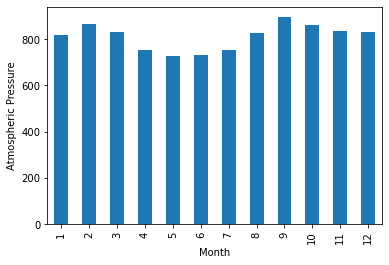

In [70]:
#Minimum pressures
df.groupby("month")["pressure"].min().plot(kind="bar", xlabel="Month", ylabel="Atmospheric Pressure")

<AxesSubplot:xlabel='Month', ylabel='Atmospheric Pressure'>

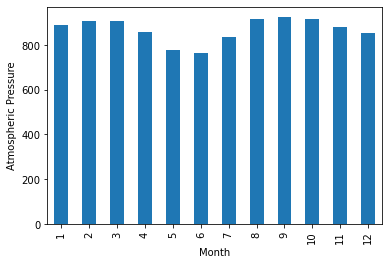

In [71]:
#Maximum pressures
df.groupby("month")["pressure"].max().plot(kind="bar", xlabel="Month", ylabel="Atmospheric Pressure")

<AxesSubplot:xlabel='Number of Terrestrial days', ylabel='Min Temps'>

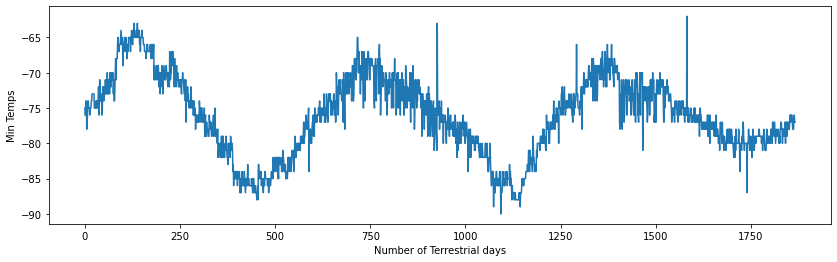

In [67]:
#About how many terrestrial (Earth) days exist in a Martian year? 
df["min_temp"].plot(figsize=(14,4), xlabel="Number of Terrestrial days", ylabel="Min Temps")



In [74]:
#Write to csv
df.to_csv('mars.csv')